# Lab 1: Multi-armed Bandits

This lab explores the multi-armed bandit problem, where an agent must choose among multiple options (arms) with unknown reward distributions to maximize its cumulative reward over time.

In [3]:
%pylab inline
from scipy.stats import norm

Populating the interactive namespace from numpy and matplotlib


In [19]:
# Number of bandit arms
K = 5 # @param {"type":"integer"}
# Number of trials (time steps)
T = 100  # @param {"type":"integer"}

# Random seed
seed = 0

Text(0.5, 1.02, 'Unknown Reward Distributions for K Bandits')

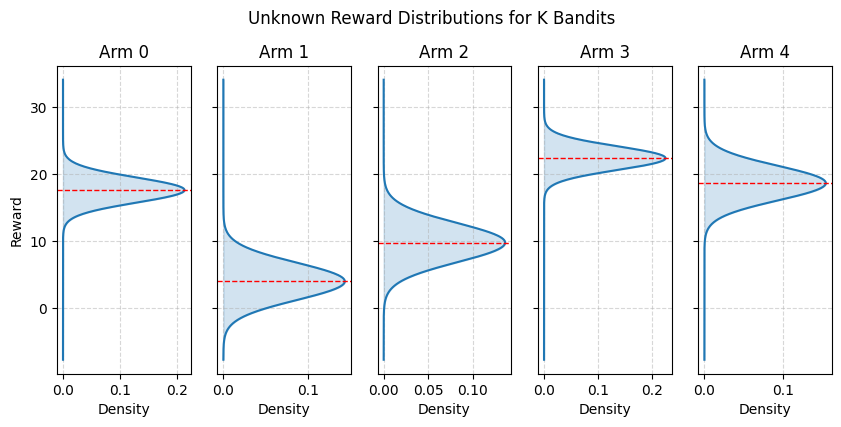

In [5]:
# Stattionary probability distribution for K bandits
np.random.seed(seed)
bandit_mean = 10 * np.random.normal(size=K)
bandit_std = np.random.uniform(1, 3, size=K)




###### Plot disttributions #######
fig, axes = plt.subplots(1, K, figsize=(2*K, 4), sharey=True)

x_min = bandit_mean.min() - 4 * bandit_std.max()
x_max = bandit_mean.max() + 4 * bandit_std.max()
x = np.linspace(x_min, x_max, 500)

for i, ax in enumerate(axes):
    y = norm.pdf(x, loc=bandit_mean[i], scale=bandit_std[i])
    ax.plot(y, x, color="C0")  # vertical orientation
    ax.fill_betweenx(x, 0, y, alpha=0.2, color="C0")
    ax.axhline(bandit_mean[i], color="r", linestyle="--", linewidth=1)  # mean
    ax.set_title(f"Arm {i}")
    ax.set_xlabel("Density")
    if i == 0:
        ax.set_ylabel("Reward")
    ax.grid(True, linestyle="--", alpha=0.5)
plt.suptitle("Unknown Reward Distributions for K Bandits", y=1.02)


Text(0, 0.5, 'Reward')

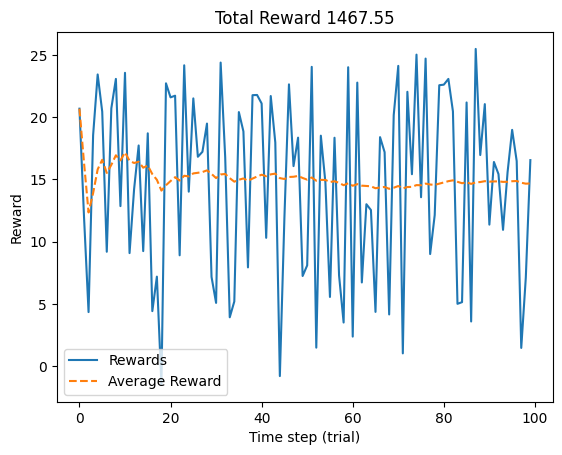

In [6]:
# Rewards
rewards = []

# For T trials, chose a random arm
for t in range(T):
  # Action: Choose a random arm
  a = np.random.randint(0, K-1)

  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)


# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")




## Exercise 1: Implement Your Own Bandit Policy

In the previous cells, we simulated a multi-armed bandit problem and observed the rewards obtained by choosing arms randomly. While this gives us a baseline, a random policy is unlikely to be the most effective way to maximize rewards.

Your task is to implement your own policy for selecting which bandit arm to pull at each time step `t`. The total reward should be higher than the

Text(0, 0.5, 'Reward')

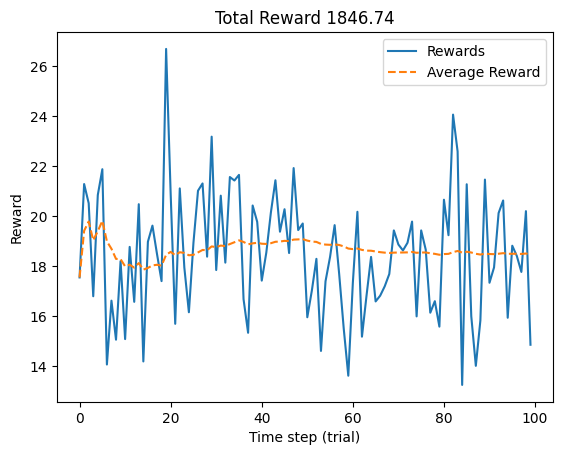

In [8]:
# Rewards
rewards = []

# For T trials, chose a random arm
for t in range(T):
  # Instead of random, I'm thinking we can select just one :)
  a = K -1

  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)


# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")

## Exercise 2: Greedy strategy


1. Implement the greedy strategy: Always choose the arm with the highest estimated average reward.

2. Implement the Epsilon-greedy strategy: with a small probability epsilon, choose a random arm; otherwise, choose the greedy arm.

3. [Optional for 337] Implement Thompson Sampling: Maintain a probability distribution over the expected reward for each arm and sample from these distributions to choose an arm.



Text(0, 0.5, 'Reward')

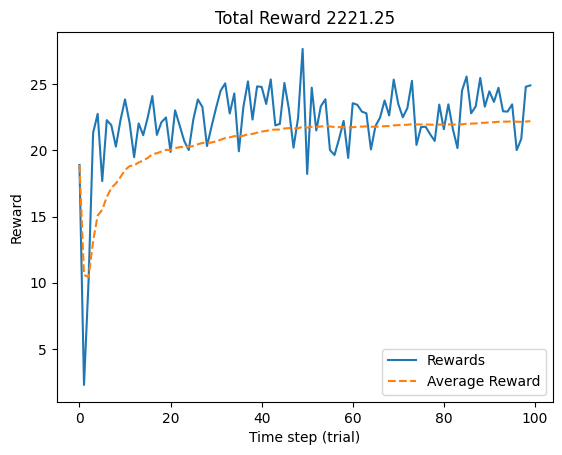

In [20]:

# 1. Greedy Strategy
# Rewards
rewards = []

# For T trials, chose a random arm
QtofA = [0] * K
counter = [0] * K

# Going to iterate once and start aggregating the average (Qt(a))
for t in range (0, K):
  a = t
  # print("aggregating for ", a)

  # Calculate the reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)

  # Add to the average reward counter using the incremental strategy (learned in class)
  counter[a] += 1
  QtofA[a] += (1/counter[a]) * (r - QtofA[a])

for t in range(K, T):
  a = np.argmax(QtofA)

  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)
  # Continue aggregating
  counter[a] += 1
  QtofA[a] += (1/counter[a]) * (r - QtofA[a])

# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")

[6, 3, 2, 88, 1]


Text(0, 0.5, 'Reward')

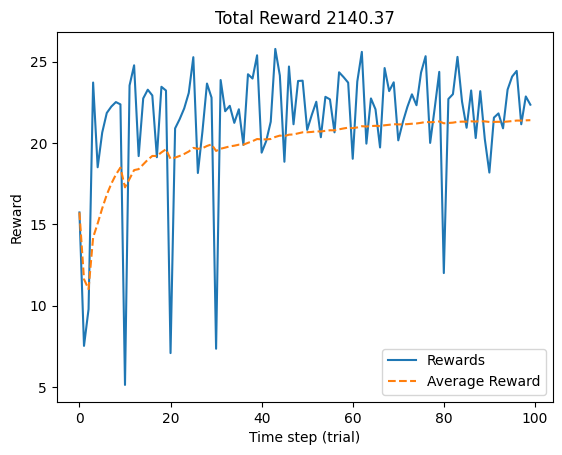

In [36]:

# 2. epsilon + Greedy
# Rewards
rewards = []

# For T trials, chose a random arm
QtofA = [0] * K
counter = [0] * K
# Epsilon variable
ep = 0.1

# Going to iterate once and start aggregating the average (Qt(a))
for t in range (0, K):
  a = t

  # Calculate the reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)

  # Add to the average reward counter using the incremental strategy (learned in class)
  counter[a] += 1
  QtofA[a] += (1/counter[a]) * (r - QtofA[a])

for t in range(K, T):
  #print(t % (T * ep) == 0)
  if(t % (T * ep) == 0):
      #print("In ep block for t = ", t)
      a = np.random.randint(0, K-1)
  else:
    # print("in reg block for t = ", t)
    a = np.argmax(QtofA)

  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)
  # Continue aggregating
  counter[a] += 1
  QtofA[a] += (1/counter[a]) * (r - QtofA[a])

print(counter)
# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")

# Questions
After compleing the excercises, answer the following questions:

1. In the epsilon-greedy strategy, compare ε = 0.1 and ε = 0.001. What are the advantages of using a larger ε?
2. If the reward distribution changes smoothly over time, is a purely greedy strategy still effective?
3. How does the choice of ε affect the balance between exploration and exploitation in the long run?  
4. Suppose the number of arms increases significantly. How might this change the effectivene4ss of the epsilon-greedy strategy?  

1. In the Epsilon strategy, using ε = 0.1 compared to ε = 0.001 gives you a trade-off lower exploration but more "exploitation". Depending on the base case in which we collect the average of the rewards and we correctly guess that arm a has a higher avg reward (which is unlikely) then exploring would be harmful so ε = 0.1 would be good. If ε = 0.001 then we'd have a higher rate of exploration which can be good in cases which we have a lot of trials and a not-so-accurate original exploration period.
2. A purely greedy strategy is not ideal for situations with smoothy changing distributions. The greedy strategy is only exploitative so some exploration has to be done to understand the changes in distribution (which is why we'd use a epsilon-greedy strategy).
3. In the long run, some more fine tuning should probably be done to understand what's the best ε value. But a higher ε value changes the balance of exploration and eexploitation, making exploration more common which may be useless after many-many-many trials have passed (since we've already explored so much and have an idea of the best arm to pull).
4. With a greater number of arms, the epsilon-greedy strategy actualy becomes better as performance is heavily dependent on how many arms we explored throughout the Trials. Our original aggregation period can only get so much information so a higher epsilon value in this case might even be better, for the purposes of getting the arms w/ the max. Something else to consider is that with more arms, you are more likely to have arms with a similar reward distribution so more fine tuning (exploration) will have to be done to collect information on THE arm with the highest reward.